In [3]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt 

In [7]:
# load the data
(x_train, y_train), (x_test, y_test)=mnist.load_data()

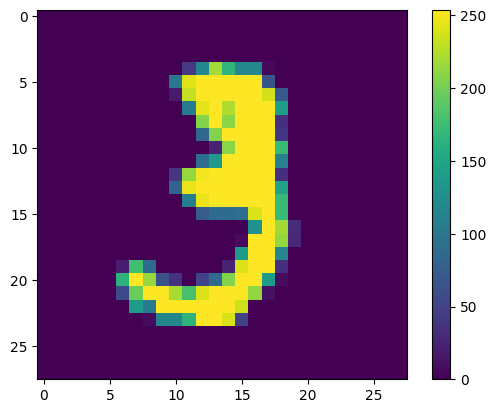

In [11]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()


In [16]:
# reshape the data
x_train=x_train.reshape(-1, 28*28).astype('float32')/255.0
x_test=x_test.reshape(-1, 28*28).astype('float32')/255.0

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
# the model with functionnal api

inputs=keras.Input(shape=(28*28))
x=layers.Dense(521, activation='relu')(inputs)
x=layers.Dense(265, activation='relu')(x)
outputs=layers.Dense(10, activation='softmax')(x)

model= keras.Model(inputs=inputs, outputs=outputs)


# model summary

model.summary()

# model compile

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=00.1),
    metrics=['accuracy']
)

# model fit

model.fit(x_train, y_train, batch_size=32, verbose=2, epochs=2)

# model evaluation

model.evaluate(x_test, y_test, batch_size=32, verbose=2)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_15 (Dense)            (None, 521)               408985    
                                                                 
 dense_16 (Dense)            (None, 265)               138330    
                                                                 
 dense_17 (Dense)            (None, 10)                2660      
                                                                 
Total params: 549,975
Trainable params: 549,975
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1875/1875 - 31s - loss: 2.5389 - accuracy: 0.2429 - 31s/epoch - 16ms/step
Epoch 2/2
1875/1875 - 33s - loss: 1.6970 - accuracy: 0.3110 - 33s/epoch - 18ms/step
313/313 - 4s - lo

[1.721089243888855, 0.28839999437332153]

In [17]:
# the model with functionnal API

inputs=keras.Input(shape=(28*28))
x=layers.Dense(641, activation='relu')(inputs)
x=layers.Dense(251, activation='relu')(x)
x=layers.Dense(100, activation='relu')(x)
outputs=layers.Dense(10, activation='softmax')(x)
model=keras.Model(inputs=inputs, outputs=outputs)

# model summary

model.summary()

# model compile

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    metrics=['accuracy']
)

# model fit

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)

# model evaluate

model.evaluate(x_test, y_test, verbose=2, batch_size=32)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 641)               503185    
                                                                 
 dense_17 (Dense)            (None, 251)               161142    
                                                                 
 dense_18 (Dense)            (None, 100)               25200     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 690,537
Trainable params: 690,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 - 46s - loss: 0.2275 - accuracy: 

[0.08150419592857361, 0.9761999845504761]

In [20]:
first_20_predict=model.predict(x_test[:21])

1/1 [==============================] - 0s 217ms/step


In [23]:
import numpy as np 

In [21]:
first_20_predict[0]

array([8.1932852e-09, 6.9552918e-08, 2.0587949e-07, 7.7591250e-07,
       3.8584899e-10, 3.3513425e-10, 7.0727814e-14, 9.9999833e-01,
       1.6633733e-09, 4.2057368e-07], dtype=float32)

In [32]:
np.argmax(first_20_predict[10])

0

In [33]:
y_test[10]

0

# Convolutionnal neural  network

In [39]:
# load the data
(x_train_C, y_train_C),(x_test_C,y_test_C)= cifar10.load_data()

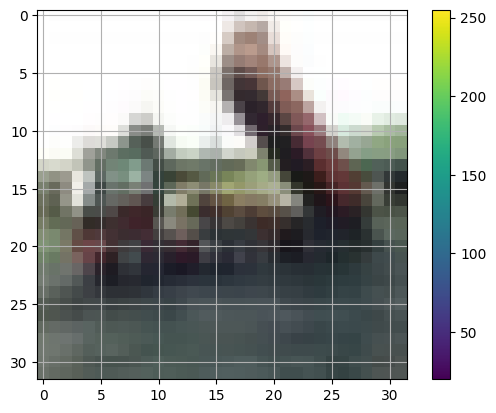

In [40]:
plt.figure()
plt.imshow(x_train_C[2])
plt.colorbar()
plt.grid()


In [41]:
x_train_C.shape

(50000, 32, 32, 3)

In [43]:
# preprocesing 
x_train_C=x_train_C.astype('float32')/255.0
x_test_C=x_test_C.astype('float32')/255.0

In [4]:
# Convolutionnal neural network with functionnal API

inputs=keras.Input(shape=(32,32,3))
x=layers.Conv2D(32,3 , padding='same',
 kernel_regularizer=regularizers.l2(0.01) )(inputs)
x=layers.BatchNormalization()(x)
x=keras.activations.relu(x)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(64, 5, padding='same', 
kernel_regularizer=regularizers.l2(0.01))(x)
x=keras.activations.relu(x)
x=layers.Conv2D(128, 3, padding='same', 
kernel_regularizer=regularizers.l2(0.01))(x)
x=layers.BatchNormalization()(x)
x=keras.activations.relu(x)
x=layers.Flatten()(x)
x=layers.Dense(64, activation='relu',
 kernel_regularizer=regularizers.l2(0.01))(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(10)(x)

model=keras.Model(inputs=inputs , outputs=outputs)


# model summary

model.summary()

# model compile

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    metrics=['accuracy']
)

# model fit 

fit_history=model.fit(x_train_C, y_train_C, batch_size=64, verbose=2, epochs=2, validation_data=(x_test_C, y_test_C))

# model evaluate 

def evaluation():
    plt.plot(fit_history.history['accuracy'], label='accuracy')
    plt.plot(fit_history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5,1])
    plt.legend(loc='lower right')

    model.evaluate(x_test_C, y_test_C, batch_size=64, verbose=2)


evaluation()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264 

NameError: name 'x_train_C' is not defined